In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Data terdiri dari 7043 samples dan 21 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Menghapus spasi yang terdapat di TotalCharges

In [ ]:
df = df.loc[-df['TotalCharges'].str.contains(' ')]

Mengubah tipe data TotalCharges menjadi float

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8944\3174716150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

Mengubah nilai SeniorCitizen menjadi Yes or No

In [ ]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['SeniorCitizen'].value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8944\1340940457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8944\1340940457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


Tidak terdapat duplikat

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Tidak terdapat missing values

### Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Data terdiri dari:
1. `customerID`: ID unik untuk setiap pelanggan.
2. `gender`: Jenis kelamin pelanggan (Male/Female).
3. `SeniorCitizen`: Menunjukkan apakah pelanggan adalah warga senior (1) atau tidak (0).
4. `Partner`: Menunjukkan apakah pelanggan memiliki pasangan (Yes/No).
5. `Dependents`: Menunjukkan apakah pelanggan memiliki tanggungan (Yes/No).
6. `tenure`: Lama waktu (bulan) pelanggan menggunakan layanan.
7. `PhoneService`: Menunjukkan apakah pelanggan memiliki layanan telepon (Yes/No).
8. `MultipleLines`: Menunjukkan apakah pelanggan memiliki layanan telepon multiple lines (Yes/No).
9. `InternetService`: Jenis layanan internet yang diambil pelanggan (DSL/Fiber optic/None).
10. `OnlineSecurity`: Menunjukkan apakah pelanggan memiliki layanan keamanan online (Yes/No).
11. `OnlineBackup`: Menunjukkan apakah pelanggan memiliki layanan backup online (Yes/No).
12. `DeviceProtection`: Menunjukkan apakah pelanggan memiliki perlindungan perangkat (Yes/No).
13. `TechSupport`: Menunjukkan apakah pelanggan memiliki akses ke dukungan teknis (Yes/No).
14. `StreamingTV`: Menunjukkan apakah pelanggan memiliki layanan streaming TV (Yes/No).
15. `StreamingMovies`: Menunjukkan apakah pelanggan memiliki layanan streaming film (Yes/No).
16. `Contract`: Jenis kontrak yang dimiliki pelanggan (Month-to-month/One year/Two year).
17. `PaperlessBilling`: Menunjukkan apakah pelanggan memilih penagihan tanpa kertas (Yes/No).
18. `PaymentMethod`: Metode pembayaran yang digunakan pelanggan (Electronic check/Mailed check).
19. `MonthlyCharges`: Biaya bulanan yang dibayarkan pelanggan.
20. `TotalCharges`: Total biaya yang dibayarkan pelanggan hingga saat ini.
21. `Churn`: Menunjukkan apakah pelanggan memutuskan untuk berhenti menggunakan layanan (Yes/No).


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Analisis berdasarkasn ringkasan statistik yang diperoleh adlah

1. tenure (lama berlangganan dalam bulan):
   - Rata-rata: 32.42 bulan
   - Nilai minimum: 1 bulan
   - Nilai maksimum: 72 bulan (6 tahun)
   - Median (50%): 29 bulan
   - 25% pelanggan berlangganan kurang dari 9 bulan
   - 75% pelanggan berlangganan kurang dari 55 bulan

   -> Terdapat variasi yang cukup besar dalam lama berlangganan pelanggan, dengan sebagian besar pelanggan bertahan antara 9 hingga 55 bulan.

2. MonthlyCharges (biaya bulanan):
   - Rata-rata: $64.80
   - Nilai minimum: $18.25
   - Nilai maksimum: $118.75
   - Median (50%): $70.35
   - 25% pelanggan membayar kurang dari $35.59 per bulan
   - 75% pelanggan membayar kurang dari $89.86 per bulan

   -> Biaya bulanan bervariasi cukup lebar, dengan mayoritas pelanggan membayar antara $35.59 hingga $89.86 per bulan.

3. TotalCharges (total biaya):
   - Rata-rata: $2,283.30
   - Nilai minimum: $18.80
   - Nilai maksimum: $8,684.80
   - Median (50%): $1,397.48
   - 25% pelanggan memiliki total biaya kurang dari $401.45
   - 75% pelanggan memiliki total biaya kurang dari $3,794.74

   -> Total biaya menunjukkan variasi yang sangat besar, mencerminkan perbedaan dalam lama berlangganan dan jenis layanan yang digunakan oleh pelanggan.

Kesimpulan:
- Data menunjukkan keragaman yang signifikan dalam perilaku pelanggan, baik dari segi lama berlangganan maupun biaya yang dikeluarkan.
- Terdapat pelanggan baru (tenure minimum 1 bulan) hingga pelanggan loyal (tenure maksimum 72 bulan).
- Biaya bulanan dan total biaya memiliki distribusi yang cukup lebar, menunjukkan variasi dalam paket layanan yang dipilih pelanggan.
- Beberapa pelanggan memiliki total biaya yang sangat tinggi, kemungkinan karena kombinasi lama berlangganan dan pemilihan layanan premium.

### Univariate Analysis

In [ ]:
categoricals = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']


##### Outlier

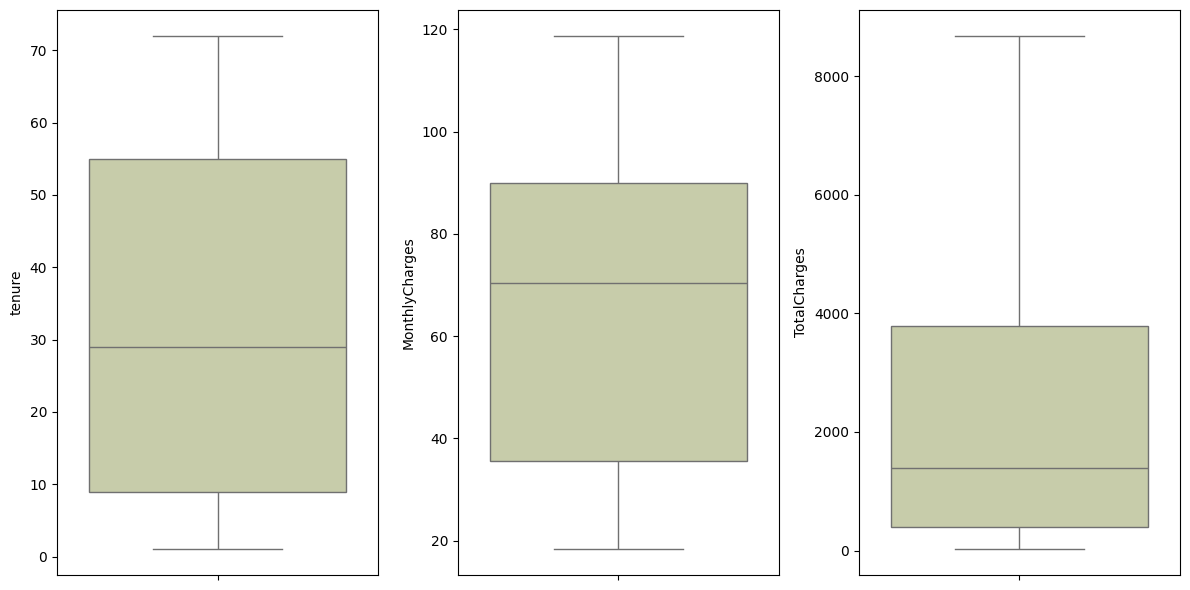

In [ ]:
plt.figure(figsize=(12,6))

# plotting
features = numericals
color = '#CBD2A4'
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color=color)
    plt.tight_layout()

Analisis ooutlier
1. Tenure (lama berlangganan):
   - Tidak ada outlier yang terlihat.
   - Distribusi cukup merata dengan median di tengah box.

2. MonthlyCharges (biaya bulanan):
   - Tidak ada outlier yang terlihat.
   - Distribusi sedikit miring ke atas, tapi masih dalam batas normal.

3. TotalCharges (total biaya):
   - Tidak ada outlier yang terlihat.
   - Distribusi miring ke atas, tapi semua data masih dalam batas whisker.

Kesimpulan:
- Tidak ada outlier yang signifikan pada ketiga variabel ini.
- Distribusi data untuk semua variabel masih dalam batas normal, meskipun TotalCharges menunjukkan kemiringan positif yang lebih jelas.


##### KDE plot for knowing the distribution form

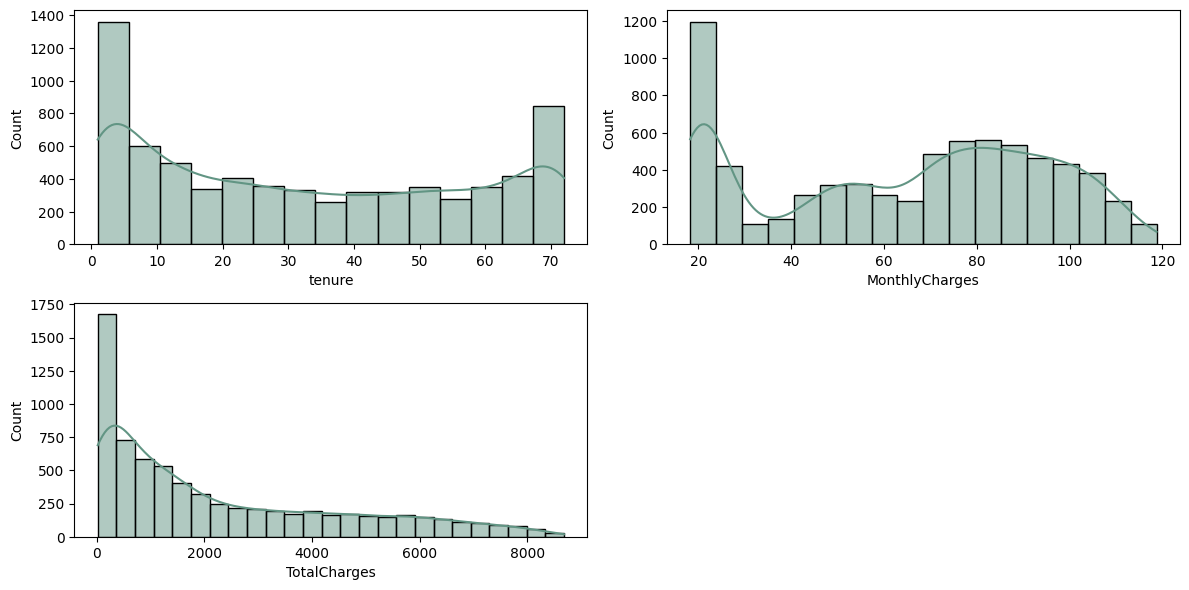

In [ ]:
plt.figure(figsize=(12,6))

features = numericals
color = '#629584'
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color=color, kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Analisi KDE

1. Tenure (lama berlangganan):
   - Distribusi bimodal, dengan puncak di awal (0-10 bulan) dan di akhir (sekitar 70 bulan).
   - Tingginya jumlah pelanggan baru (0-10 bulan) menunjukkan akuisisi pelanggan yang baik.
   - Puncak kedua di sekitar 70 bulan menandakan adanya kelompok pelanggan loyal jangka panjang.
   - Terjadi penurunan jumlah pelanggan antara 10-40 bulan, yang mungkin mengindikasikan periode kritis untuk retensi pelanggan.

2. MonthlyCharges (biaya bulanan):
   - Distribusi multimodal dengan beberapa puncak.
   - Puncak pertama di sekitar $20, mungkin mewakili paket dasar atau entry-level.
   - Puncak tertinggi di sekitar $70-$80, kemungkinan merepresentasikan paket populer atau standar.
   - Puncak lain di sekitar $90-$100, mungkin untuk paket premium.
   - Distribusi yang lebar menunjukkan variasi signifikan dalam pilihan paket layanan pelanggan.

3. TotalCharges (total biaya):
   - Distribusi sangat miring ke kanan (right-skewed).
   - Mayoritas pelanggan memiliki total biaya yang relatif rendah (di bawah $2000).
   - Terdapat ekor panjang ke kanan, menunjukkan sejumlah kecil pelanggan dengan total biaya sangat tinggi.
   - Pola ini konsisten dengan kombinasi pelanggan baru (total biaya rendah) dan pelanggan lama atau pengguna layanan intensif (total biaya tinggi).

Kesimpulan:
- Perusahaan memiliki campuran pelanggan baru dan loyal, dengan tantangan retensi di periode menengah.
- Terdapat variasi besar dalam pilihan paket layanan, yang tercermin dari distribusi MonthlyCharges.
- TotalCharges menunjukkan sebagian besar pelanggan masih dalam tahap awal hubungan dengan perusahaan, sementara ada kelompok kecil pelanggan yang telah menghasilkan pendapatan signifikan.
- Strategi pemasaran dan retensi mungkin perlu disesuaikan untuk mengatasi penurunan di periode tengah tenure dan untuk memaksimalkan konversi pelanggan ke paket dengan nilai lebih tinggi.

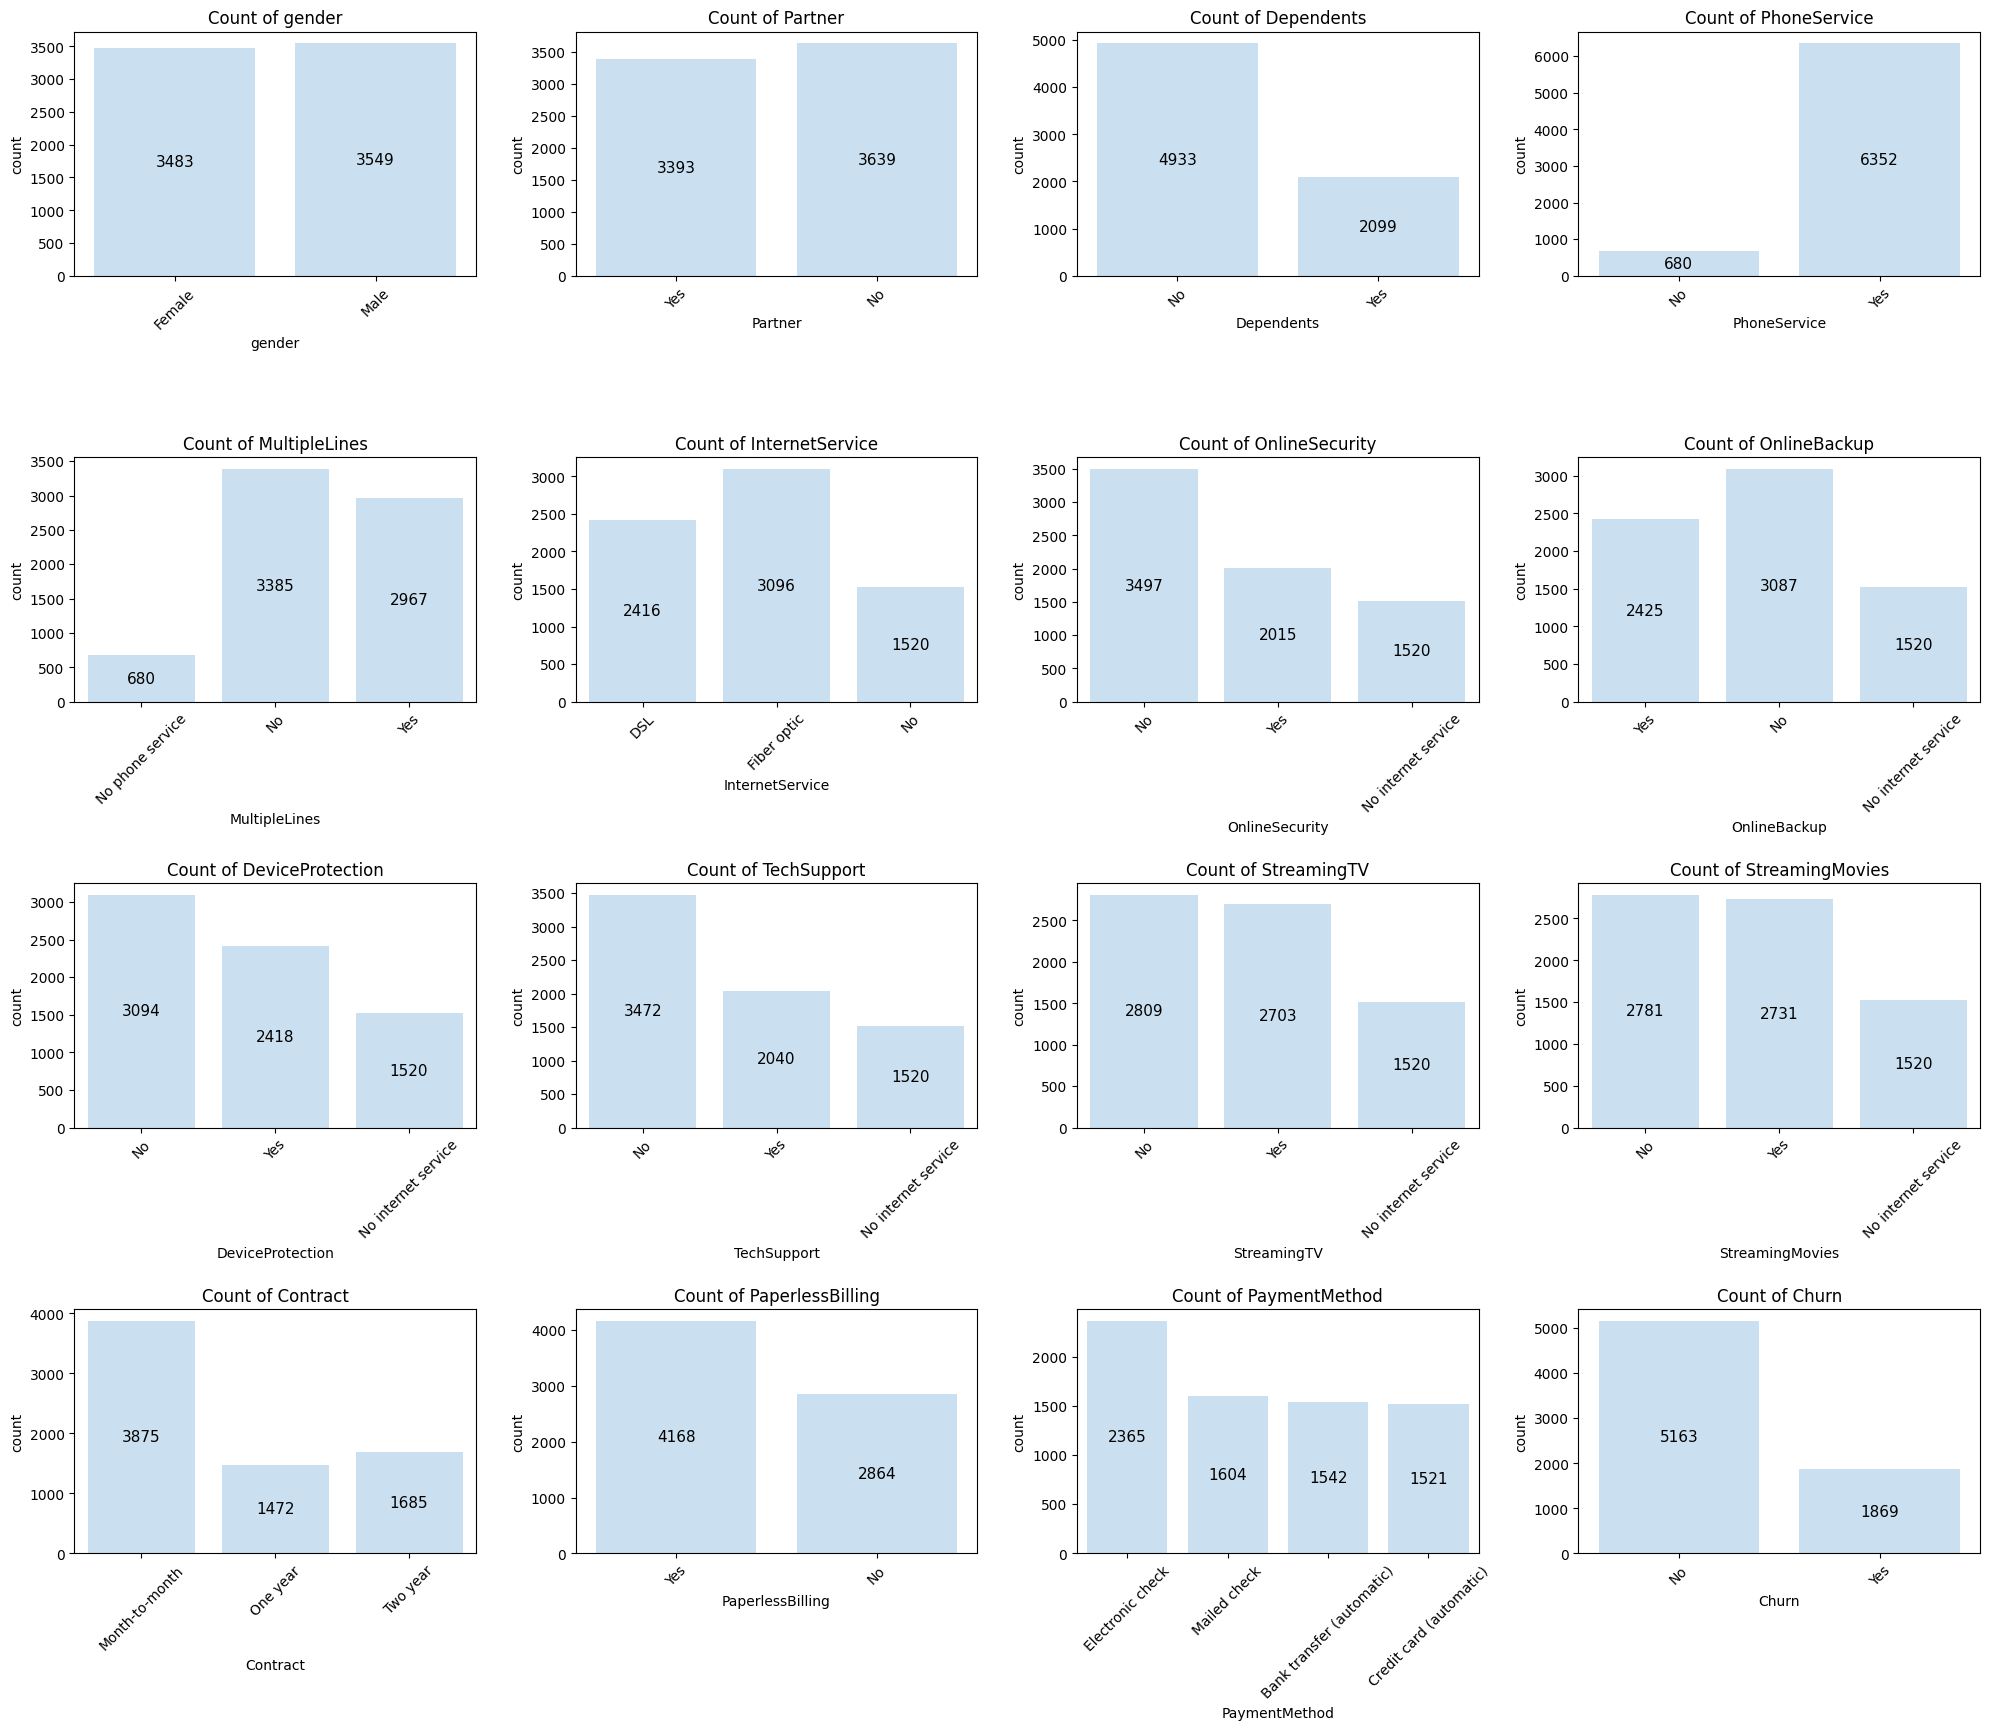

In [ ]:
plt.figure(figsize=(20, 20))

# categorical feature
for i, feature in enumerate(categoricals):
    plt.subplot(5, 4, i + 1)
    ax = sns.countplot(data=df, x=feature, color='#C4E1F6')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

    # tambahkan annot
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center',
                    fontsize=11, color='black', xytext=(0, 0),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


Analisis

1. Gender: Hampir seimbang antara Female (3483) dan Male (3549).

2. Partner: Sedikit lebih banyak pelanggan tanpa partner (3639) dibanding dengan partner (3393).

3. Dependents: Mayoritas pelanggan tidak memiliki tanggungan (4933 vs 2099).

4. PhoneService: Mayoritas besar pelanggan memiliki layanan telepon (6352 vs 680).

5. MultipleLines: Dari pelanggan dengan layanan telepon, lebih banyak yang tidak memiliki multiple lines (3385 vs 2967).

6. InternetService: Fiber optic paling populer (3096), diikuti DSL (2416), dan sebagian kecil tanpa layanan internet (1520).

7. OnlineSecurity: Lebih banyak pelanggan tanpa layanan keamanan online (3497 vs 2015).

8. OnlineBackup: Lebih banyak pelanggan tanpa layanan backup online (3087 vs 2425).

9. DeviceProtection: Lebih banyak pelanggan tanpa perlindungan perangkat (3094 vs 2418).

10. TechSupport: Lebih banyak pelanggan tanpa dukungan teknis (3472 vs 2040).

11. StreamingTV dan StreamingMovies: Distribusi hampir merata antara yang memiliki dan tidak memiliki layanan streaming.

12. Contract: Mayoritas pelanggan memilih kontrak bulanan (3875), diikuti kontrak dua tahun (1685) dan satu tahun (1472).

13. PaperlessBilling: Lebih banyak pelanggan memilih penagihan tanpa kertas (4168 vs 2864).

14. PaymentMethod: Electronic check paling populer (2365), diikuti oleh metode pembayaran lainnya dengan distribusi yang hampir merata.

15. Churn: Mayoritas pelanggan tidak churn (5163), namun ada 1869 pelanggan yang churn.

Kesimpulan:
- Perusahaan memiliki basis pelanggan yang beragam dengan preferensi layanan yang bervariasi.
- Mayoritas pelanggan memilih layanan telepon dan internet, dengan fiber optic sebagai pilihan internet terpopuler.
- Ada peluang untuk meningkatkan adopsi layanan tambahan seperti keamanan online, backup, dan dukungan teknis.
- Kontrak bulanan lebih disukai, menunjukkan preferensi fleksibilitas dari pelanggan.
- Tingkat churn sekitar 26.6%, yang cukup signifikan dan perlu ditangani.
- Penagihan tanpa kertas dan pembayaran elektronik populer, menunjukkan kecenderungan ke arah digital.

### Multivariate Analysis

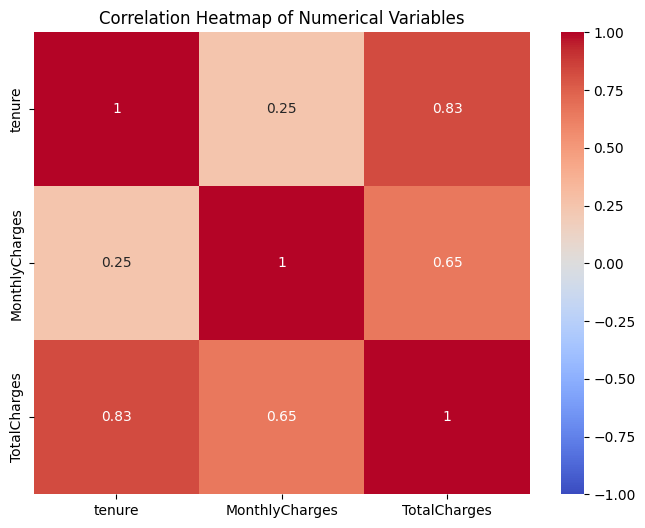

In [ ]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix
correlation = df[numericals].corr()

# Plo heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Analisis

1. Tenure vs MonthlyCharges:
   - Korelasi lemah positif (0.25)
   - Ini menunjukkan ada sedikit kecenderungan bahwa semakin lama pelanggan berlangganan, semakin tinggi biaya bulanannya, namun hubungannya tidak kuat.

2. Tenure vs TotalCharges:
   - Korelasi kuat positif (0.83)
   - Hal ini sangat masuk akal karena semakin lama pelanggan berlangganan, total biaya yang mereka bayarkan akan semakin tinggi.

3. MonthlyCharges vs TotalCharges:
   - Korelasi moderat positif (0.65)
   - Ini menunjukkan bahwa pelanggan dengan biaya bulanan yang lebih tinggi cenderung memiliki total biaya yang lebih tinggi, namun hubungannya tidak sekuat tenure vs TotalCharges.

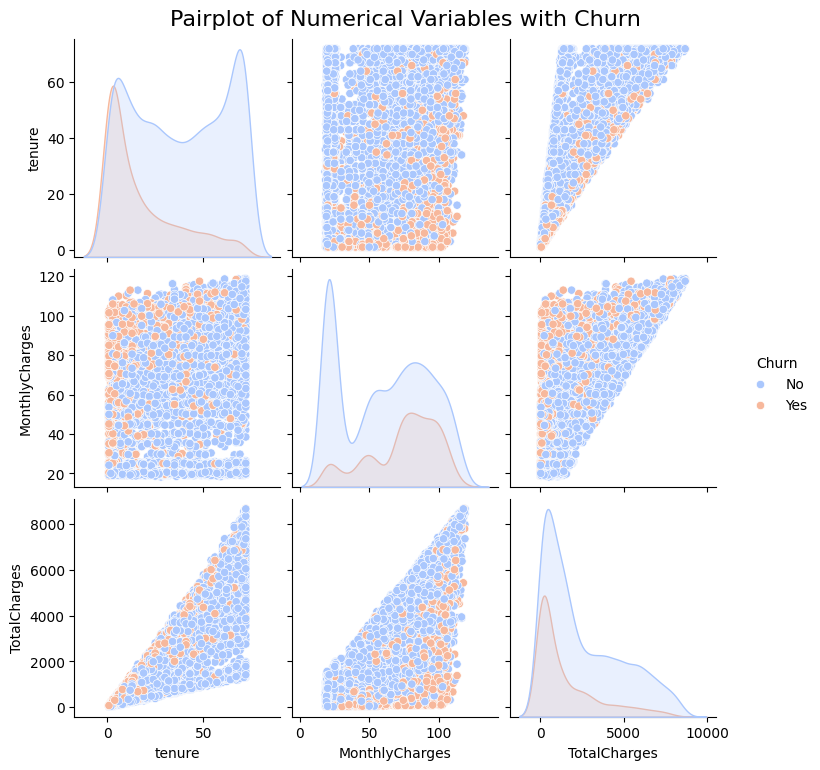

In [ ]:
# Pairplot numerical features, colored by 'Churn'
pairplot = sns.pairplot(df[numericals + ['Churn']], hue='Churn', palette='coolwarm', diag_kind='kde')

# judul
plt.suptitle('Pairplot of Numerical Variables with Churn', y=1.02, fontsize=16)  # y=1.02 shifts the title upwards

plt.show()

Analisis
1. Tenure vs Churn:
   - Pelanggan dengan tenure rendah (0-20 bulan) memiliki tingkat churn yang lebih tinggi.
   - Pelanggan dengan tenure tinggi cenderung lebih loyal (churn lebih rendah).
   - Ada penurunan drastis churn setelah sekitar 20 bulan berlangganan.

2. MonthlyCharges vs Churn:
   - Pelanggan dengan MonthlyCharges lebih tinggi cenderung memiliki tingkat churn yang lebih tinggi.
   - Distribusi churn lebih merata di seluruh rentang MonthlyCharges, namun ada konsentrasi churn yang lebih tinggi di bagian atas.

3. TotalCharges vs Churn:
   - Pelanggan dengan TotalCharges rendah memiliki tingkat churn yang lebih tinggi.
   - Semakin tinggi TotalCharges, semakin rendah kemungkinan churn.
   - Ini konsisten dengan pola tenure, karena TotalCharges berkorelasi kuat dengan tenure.

4. Tenure vs MonthlyCharges:
   - Tidak ada pola yang jelas, menunjukkan korelasi yang lemah.
   - Pelanggan dengan tenure tinggi memiliki variasi MonthlyCharges yang lebih besar.

5. Tenure vs TotalCharges:
   - Hubungan positif yang kuat dan linear.
   - Semakin lama tenure, semakin tinggi TotalCharges, yang masuk akal.

6. MonthlyCharges vs TotalCharges:
   - Ada hubungan positif, tapi tidak sekuat Tenure vs TotalCharges.
   - Pelanggan dengan MonthlyCharges tinggi cenderung memiliki TotalCharges yang lebih tinggi, tapi ada variasi yang signifikan.

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1306      1637
Yes                 1655       166        48


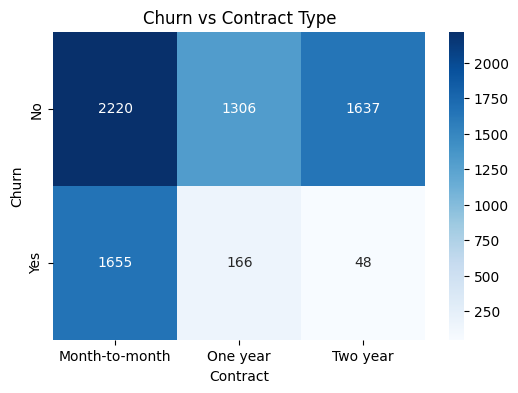

In [ ]:
churn_contract_ct = pd.crosstab(df['Churn'], df['Contract'])
print(churn_contract_ct)

# Visualize the crosstab using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(churn_contract_ct, annot=True, cmap='Blues', fmt='d')
plt.title('Churn vs Contract Type')
plt.show()

Analisis
1. Month-to-month Contract:
   - Total pelanggan: 3875 (2220 + 1655)
   - Churn: 1655 (42.7%)
   - Tidak churn: 2220 (57.3%)
   - Memiliki tingkat churn tertinggi di antara semua jenis kontrak.

2. One year Contract:
   - Total pelanggan: 1472 (1306 + 166)
   - Churn: 166 (11.3%)
   - Tidak churn: 1306 (88.7%)
   - Tingkat churn jauh lebih rendah dibandingkan kontrak bulanan.

3. Two year Contract:
   - Total pelanggan: 1685 (1637 + 48)
   - Churn: 48 (2.8%)
   - Tidak churn: 1637 (97.2%)
   - Memiliki tingkat churn terendah di antara semua jenis kontrak.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8944\1706955792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm', ax=axes[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8944\1706955792.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df, x='Churn', y='tenure', palette='coolwarm', ax=axes[1])


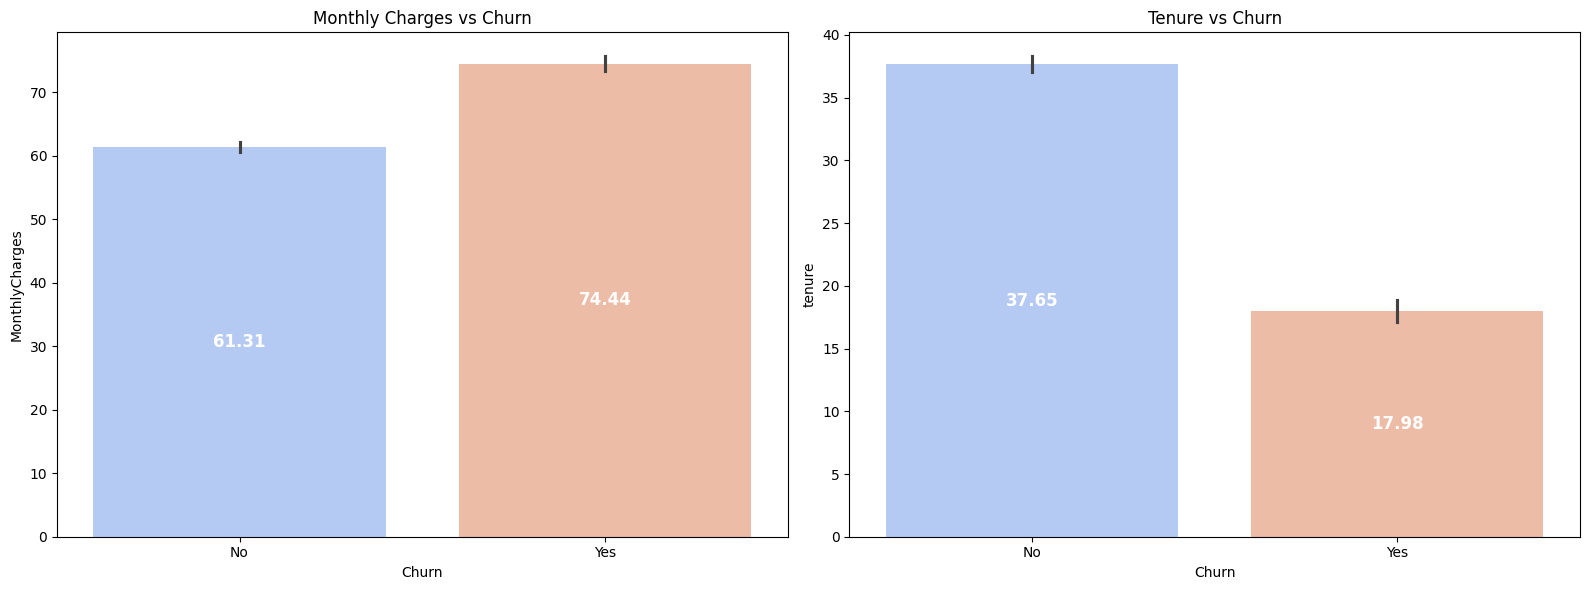

In [ ]:
# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot MonthlyCharges vs Churn
ax1 = sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm', ax=axes[0])

# tambahkan annot
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                 ha = 'center', va = 'center',
                 color='white', fontsize=12, fontweight='bold')

ax1.set_title('Monthly Charges vs Churn')

# BarplotTenure vs Churn
ax2 = sns.barplot(data=df, x='Churn', y='tenure', palette='coolwarm', ax=axes[1])

# Annot
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                 ha = 'center', va = 'center',
                 color='white', fontsize=12, fontweight='bold')

ax2.set_title('Tenure vs Churn')

plt.tight_layout()
plt.show()

Analisis:

* Biaya Bulanan (Monthly Charges):
   * Pelanggan yang berhenti berlangganan (Yes Churn) cenderung memiliki biaya bulanan yang lebih tinggi dibandingkan dengan pelanggan yang tetap bertahan (No Churn). Hal ini menunjukkan bahwa biaya bulanan yang tinggi bisa menjadi salah satu faktor yang mendorong pelanggan untuk berhenti berlangganan.
   * Rata-rata biaya bulanan untuk pelanggan yang churn adalah sekitar 74.44, sedangkan untuk pelanggan yang tidak churn adalah sekitar 61.31.

* Masa Berlangganan (Tenure):
   * Pelanggan yang tetap bertahan (No Churn) cenderung memiliki masa berlangganan yang lebih lama dibandingkan dengan pelanggan yang berhenti berlangganan (Yes Churn). Ini menunjukkan bahwa pelanggan yang sudah lama menjadi pelanggan cenderung lebih loyal dan tidak mudah berganti layanan.
   * Rata-rata masa berlangganan untuk pelanggan yang churn adalah sekitar 17.98, sedangkan untuk pelanggan yang tidak churn adalah sekitar 37.65.


### deep dive EDA


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Pertanyaan
1. Bagaimana kontribusi total biaya berdasarkan metode pembayaran (PaymentMethod)?
2. Berapa lama (tenure) rata-rata pelanggan yang churn dibandingkan dengan yang tidak churn?
3. Bagaimana distribusi pelanggan berdasarkan jenis layanan internet dan apakah ada perbedaan signifikan dalam tingkat churn di antara mereka?
4. Bagaimana tren rata-rata biaya bulanan pelanggan (MonthlyCharges) berubah berdasarkan lama berlangganan (tenure)?


##### 1. Bagaimana kontribusi total biaya berdasarkan metode pembayaran (PaymentMethod)?

In [ ]:
total_charges_payment_method = df.groupby('PaymentMethod')['TotalCharges'].sum()
total_charges_payment_method

PaymentMethod
Bank transfer (automatic)    4748279.90
Credit card (automatic)      4671593.35
Electronic check             4944903.25
Mailed check                 1691392.20
Name: TotalCharges, dtype: float64

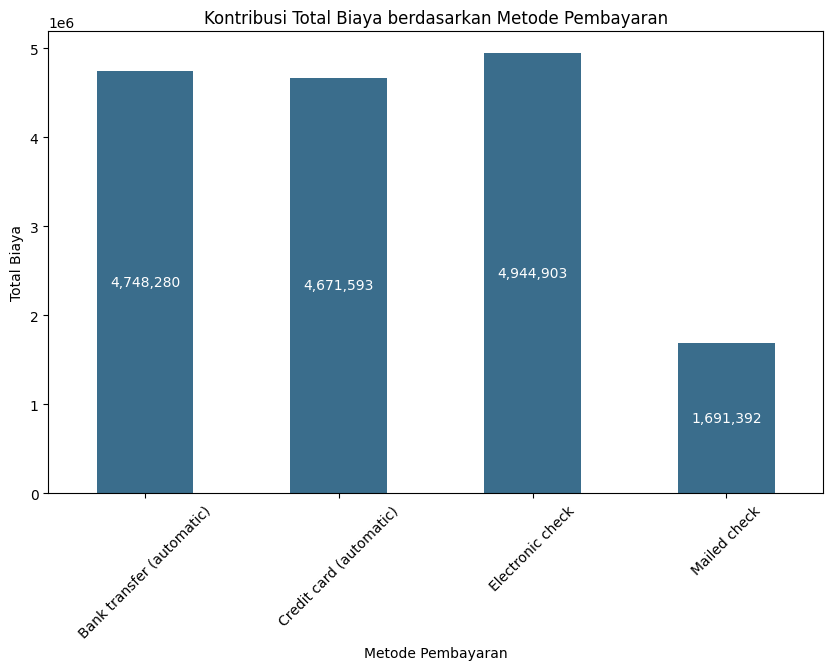

In [ ]:
# Membuat visualisasi
ax = total_charges_payment_method.plot(kind='bar', figsize=(10, 6), color='#3A6D8C')
plt.title('Kontribusi Total Biaya berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Biaya')
plt.xticks(rotation=45)

# annot
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=10, color='white')

plt.show()


Analisis:
1. **Electronic check**:
   - Menyumbang total biaya tertinggi, yaitu **4,944,903**.
   
2. **Bank transfer (automatic)**:
   - Menyumbang total biaya sebesar **4,748,280**.
   
3. **Credit card (automatic)**:
   - Menyumbang total biaya sebesar **4,671,593**.

4. **Mailed check**:
   - Menyumbang total biaya terendah, yaitu **1,691,392**.


- **Electronic check** adalah metode pembayaran dengan kontribusi biaya terbesar, diikuti oleh **Bank transfer otomatis** dan **Credit card otomatis**.
- **Mailed check** menyumbang biaya paling rendah dibandingkan metode lainnya, yang bisa menunjukkan bahwa lebih sedikit pelanggan yang menggunakan metode ini atau mereka melakukan pembayaran dengan jumlah yang lebih kecil.


##### 2. Berapa lama (tenure) rata-rata pelanggan yang churn dibandingkan dengan yang tidak churn?

In [ ]:
average_tenure = df.groupby('Churn')['tenure'].mean()
average_tenure

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

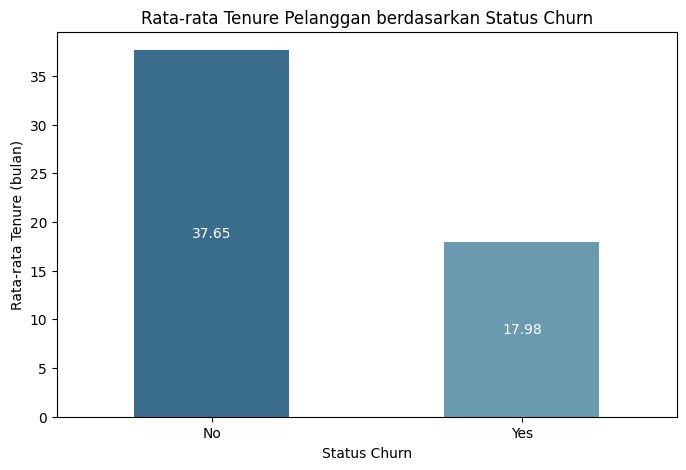

In [ ]:
# Membuat visualisasi
bars = average_tenure.plot(kind='bar', figsize=(8, 5), color=['#3A6D8C', '#6A9AB0'])
plt.title('Rata-rata Tenure Pelanggan berdasarkan Status Churn')
plt.xlabel('Status Churn')
plt.ylabel('Rata-rata Tenure (bulan)')
plt.xticks(rotation=0)

# Menambahkan nilai di tengah batang
for bar in bars.patches:
    height = bar.get_height()
    # Menempatkan nilai di tengah batang
    bars.annotate(f'{height:.2f}',  # format dengan dua desimal
                   (bar.get_x() + bar.get_width() / 2, height / 2),  # posisi x, y di tengah batang
                   ha='center', va='center', color='white')  # horizontal align center, vertical align center

plt.show()

Analisis:
1. **Pelanggan yang Tidak Churn**:
   - Memiliki rata-rata tenure sebesar **37,65 bulan**.
   - Ini berarti pelanggan yang tidak churn cenderung memiliki masa langganan yang lebih lama.

2. **Pelanggan yang Churn**:
   - Memiliki rata-rata tenure sebesar **17,98 bulan**.
   - Pelanggan yang churn memiliki masa langganan yang jauh lebih pendek dibandingkan yang tidak churn.


- Pelanggan yang **tidak churn** memiliki rata-rata masa berlangganan lebih dari dua kali lipat dibandingkan dengan pelanggan yang **churn**.
- Ini menunjukkan bahwa pelanggan yang lebih lama menggunakan layanan cenderung lebih loyal dan tidak meninggalkan layanan dibandingkan pelanggan dengan masa berlangganan yang lebih singkat.

##### 3. Bagaimana distribusi pelanggan berdasarkan jenis layanan internet dan apakah ada perbedaan signifikan dalam tingkat churn di antara mereka?

In [ ]:
# Assuming your data is in a DataFrame called 'df'
churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_by_internet


Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


<Figure size 1000x600 with 0 Axes>

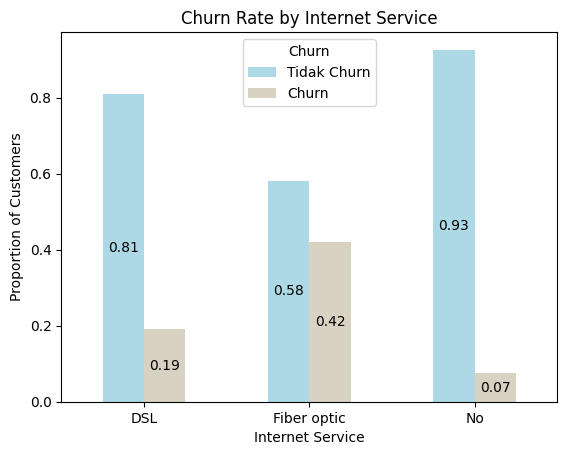

In [ ]:
# Membuat visualisasi batang
plt.figure(figsize=(10, 6))
bars = churn_by_internet.plot(kind='bar', color=['lightblue', '#D8D2C2'])
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)

# Menambahkan nilai di dalam batang dengan posisi yang lebih baik
for container in bars.containers:
    for rect in container:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height / 2,
                f'{height:.2f}', ha='center', va='center', color='black')

plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.show()


Analisis:
- **Tidak ada Layanan Internet** memiliki tingkat retensi tertinggi (93% tidak churn), yang berarti pelanggan tanpa layanan internet lebih cenderung tetap berlangganan.
- **Fiber optic** menunjukkan tingkat churn yang relatif tinggi (42%), yang mengindikasikan banyak pelanggan yang berhenti berlangganan dibandingkan dengan pengguna DSL atau tanpa layanan internet.
- **DSL** memiliki tingkat churn yang sedang (19%), namun sebagian besar pelanggannya tetap berlangganan.


##### 4. Bagaimana tren rata-rata biaya bulanan pelanggan (MonthlyCharges) berubah berdasarkan lama berlangganan (tenure)?

In [ ]:
average_monthly_charges = df.groupby('tenure')['MonthlyCharges'].mean()


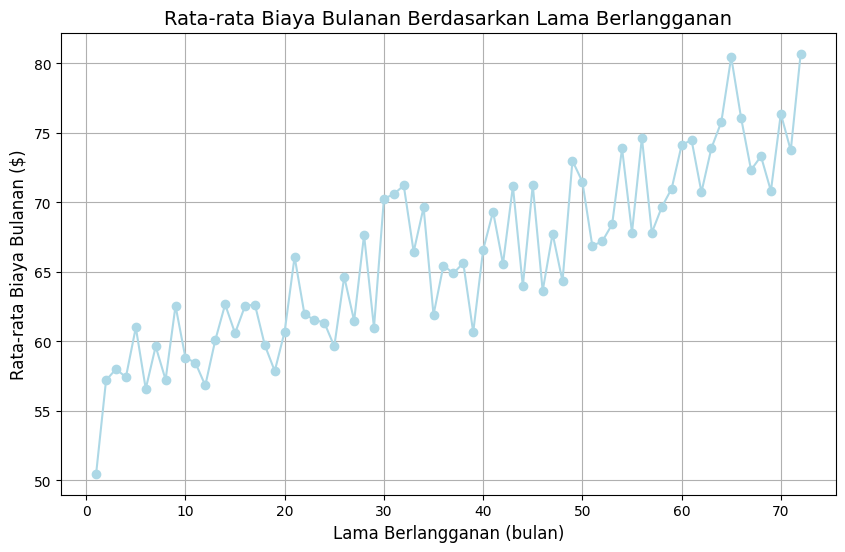

In [ ]:
# Membuat plot line chart
plt.figure(figsize=(10, 6))
plt.plot(average_monthly_charges.index, average_monthly_charges.values, marker='o', color='lightblue')

# Menambahkan judul dan label
plt.title('Rata-rata Biaya Bulanan Berdasarkan Lama Berlangganan', fontsize=14)
plt.xlabel('Lama Berlangganan (bulan)', fontsize=12)
plt.ylabel('Rata-rata Biaya Bulanan ($)', fontsize=12)

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Analisis:
- Rata-rata biaya bulanan cenderung meningkat seiring dengan bertambahnya lama berlangganan.
- Meskipun terdapat fluktuasi, tren umumnya naik, yang menunjukkan adanya korelasi positif antara durasi berlangganan dengan biaya bulanan.
